In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

Data Preprocessing

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
print(df.shape)

(5110, 12)


In [ ]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
print(df.head())
print(df.tail())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
         id  gender   age  hypertension  heart_disease e

In [ ]:
print("Dimensions of DataFrame:", df.ndim)

Dimensions of DataFrame: 2


In [ ]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
#Removing 'Other' gender
if 'Other' in df['gender'].values:
    df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)


In [ ]:
#Counting missing values per column
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)


Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


EDA

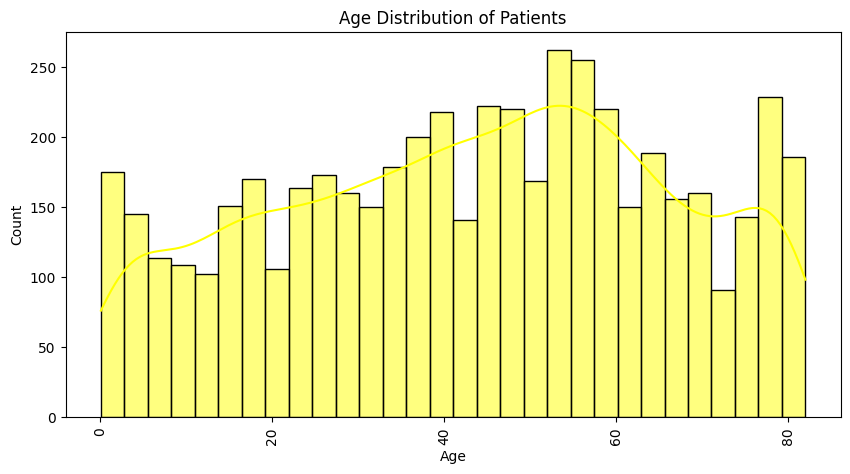

In [ ]:
#Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True, color='yellow')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.xticks(rotation=90)
plt.show()


<ipython-input-12-0064d2221fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='work_type', palette='viridis')


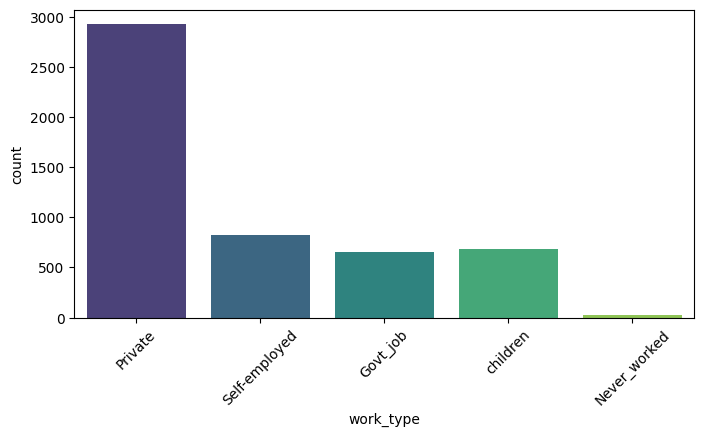

In [ ]:
#Work type distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='work_type', palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#Previously when i checked for missing data along all columns i found missing data in BMI coloumn here im handling it
#using median of column
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-14-534a62002263>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
#Converting categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Spliting data into features(X) and target variable(y)
X = df.drop(columns=['stroke'])  #Features
y = df['stroke']  #Target variable

#Spliting data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scaling the data using StandardScaler(since age, glucose, and BMI vary greatly)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-17-d78091018a6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['stroke'], palette="viridis")


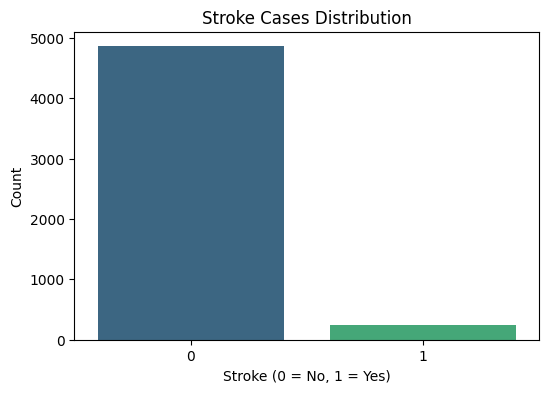

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['stroke'], palette="viridis")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Stroke Cases Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['avg_glucose_level'], hue=df['stroke'], palette="coolwarm", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.title("Age vs Glucose Level (Stroke vs No Stroke)")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

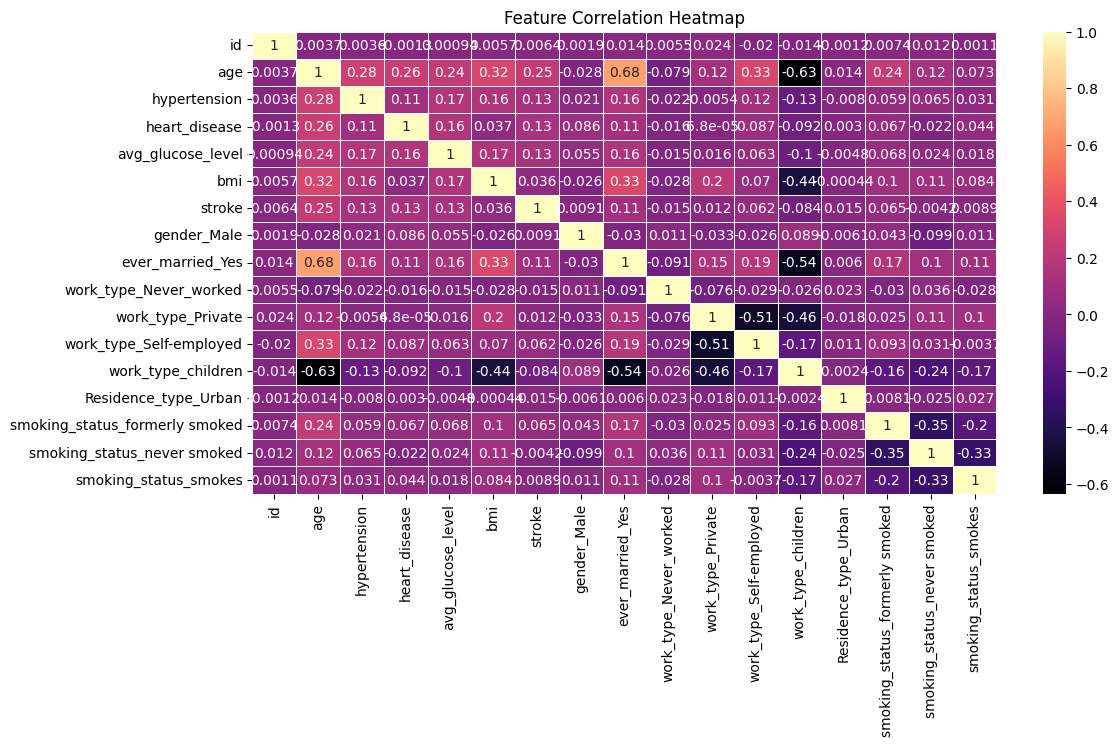

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

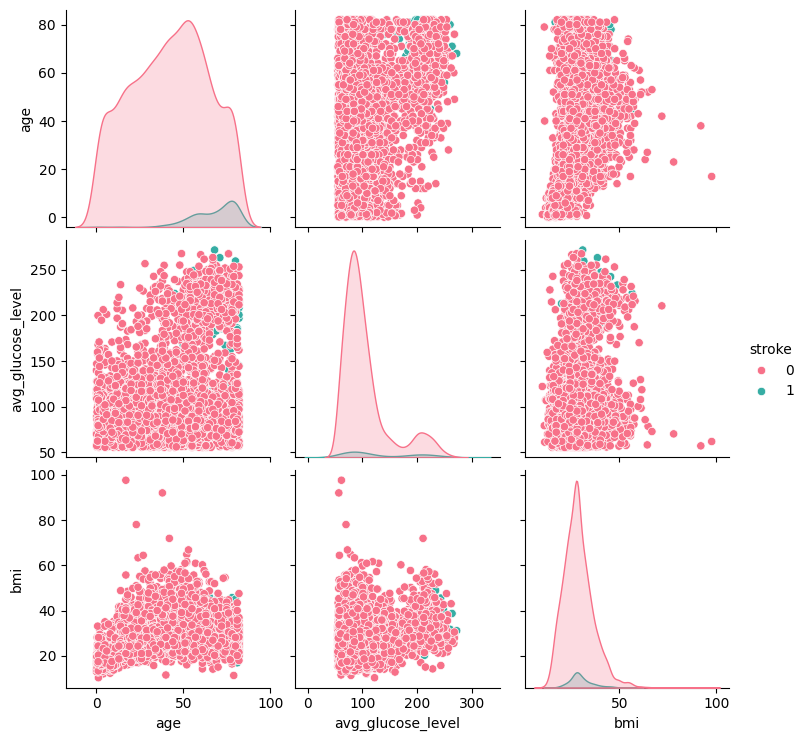

In [ ]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette="husl")
plt.show()

<ipython-input-22-1a66e5bd567a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["stroke"], y=df["age"], palette="coolwarm")


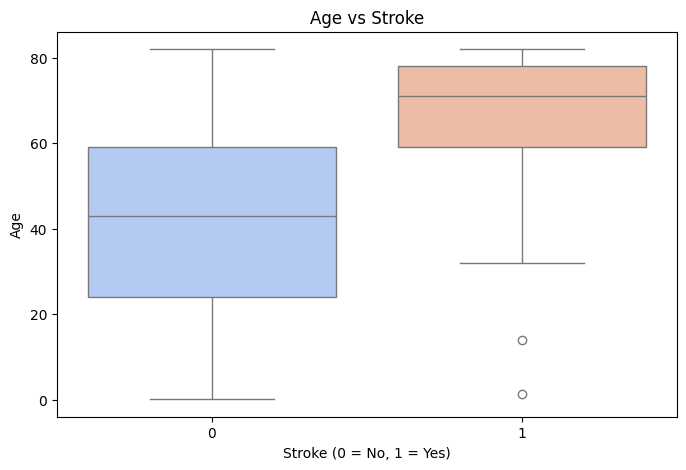

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["stroke"], y=df["age"], palette="coolwarm")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age vs Stroke")
plt.show()


Model Training & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Evaluvating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9530332681017613
Confusion Matrix:
 [[972   0]
 [ 48   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.04      0.08        50

    accuracy                           0.95      1022
   macro avg       0.98      0.52      0.53      1022
weighted avg       0.96      0.95      0.93      1022



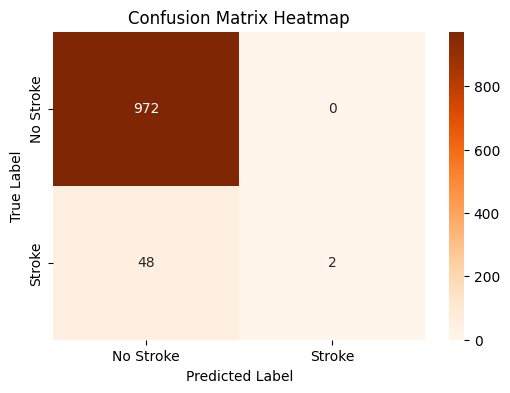

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Generating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Ploting the Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


Handling imbalanced data

In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

#Training Random Forest again with balanced data because previously we did Logistic Regression on unbalanced data
rf_model_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sm.fit(X_train_sm, y_train_sm)

#Predicting
y_pred_sm = rf_model_sm.predict(X_test)

#Evaluating the model after SMOTE
print("Random Forest Accuracy after SMOTE:", accuracy_score(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_sm))

Random Forest Accuracy after SMOTE: 0.9324853228962818
Confusion Matrix:
 [[946  26]
 [ 43   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.21      0.14      0.17        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.93      1022



In [ ]:
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_sm).value_counts())

Before SMOTE: stroke
0    3888
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3888
1    3888
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

<ipython-input-28-a49ab8d55b8d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train_df, x='stroke', palette="Reds")
<ipython-input-28-a49ab8d55b8d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train_sm_df, x='stroke', palette="Blues")


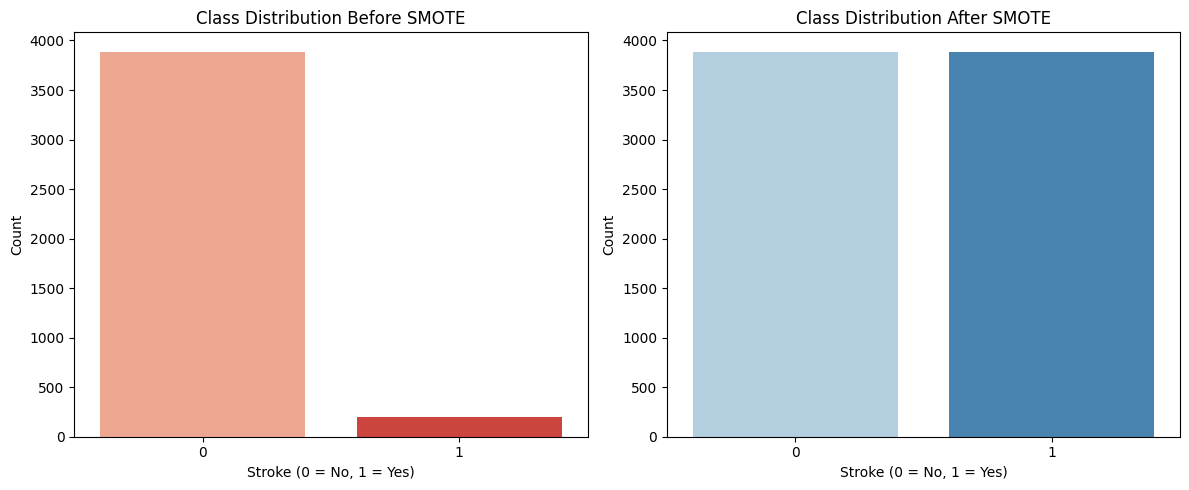

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Converting y_train and y_train_sm into DataFrame for compatibility with sns.countplot()
y_train_df = pd.DataFrame(y_train, columns=['stroke'])
y_train_sm_df = pd.DataFrame(y_train_sm, columns=['stroke'])

plt.figure(figsize=(12, 5))

#Count plot before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(data=y_train_df, x='stroke', palette="Reds")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")

#Count plot after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(data=y_train_sm_df, x='stroke', palette="Blues")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
#Actual vs Predicted for Logistic Regression
logistic_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("Logistic Regression: Actual vs Predicted")
print(logistic_results.head(10))  # Show first 10 rows


Logistic Regression: Actual vs Predicted
      Actual  Predicted
3667       0          0
2217       0          0
374        0          0
2392       0          0
299        0          0
511        0          0
716        0          0
741        0          0
2377       0          0
1451       0          0


In [ ]:
#Actual vs Predicted for Random Forest after SMOTE
rf_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_sm
})

print("Random Forest (SMOTE): Actual vs Predicted")
print(rf_results.head(10))  # Show first 10 rows


Random Forest (SMOTE): Actual vs Predicted
      Actual  Predicted
3667       0          0
2217       0          0
374        0          0
2392       0          0
299        0          0
511        0          0
716        0          0
741        0          0
2377       0          0
1451       0          0


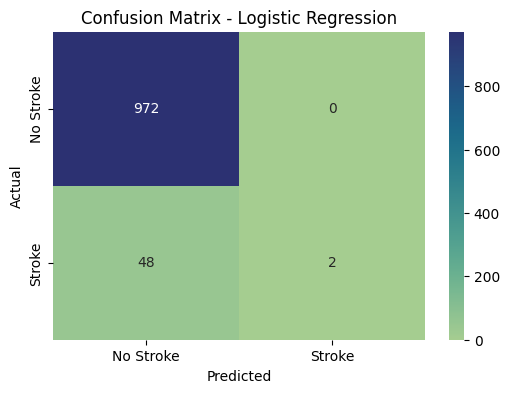

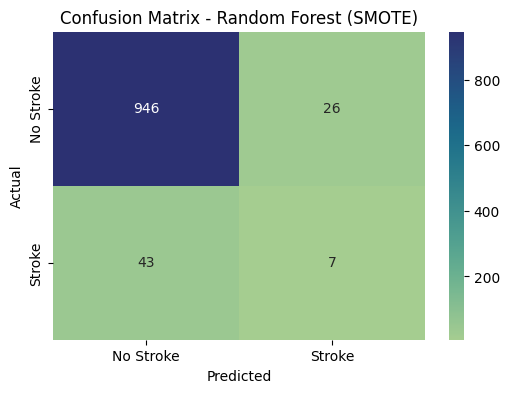

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

#Confusion matrix of Logistic Regression
plot_conf_matrix(y_test, y_pred, "Confusion Matrix - Logistic Regression", cmap="crest")

#Confusin matrix of Random Forest after SMOTE
plot_conf_matrix(y_test, y_pred_sm, "Confusion Matrix - Random Forest (SMOTE)", cmap="crest")
